In [1]:
import pandas as pd
import numpy as np

In [3]:
import os
os.chdir("/g/data/jr19/rh2942/text-empathy/")

In [3]:
train_file = "./data/PREPROCESSED-essay-train.csv"
dev_file = "./data/PREPROCESSED-essay-dev.csv"
train_dev_file = "./data/PREPROCESSED-essay-train-dev.csv"
test_file = "./data/PREPROCESSED-test.csv"

In [4]:
train = pd.read_csv(train_file, header=0, index_col=0)

In [8]:
train.head(1)

,conversation_id,article_id,essay,speaker_id,gender,education,race,age,income,speaker_number,...,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,demographic,article,demographic_essay
0,2,35,It breaks my heart to see people living in tho...,30,1.0,6.0,3.0,37.0,40000.0,1,...,1.0,6.5,6.0,4.857,2.0,3.429,5.0,I am a 37-year-old male of Black or African Am...,Canadian actor Richard Hong was found dead in ...,I am a 37-year-old male of Black or African Am...


In [6]:
train.shape

(779, 27)

In [26]:
train['speaker_id'].unique()

array([30, 19, 17, 16, 49, 24, 43, 40, 13, 37, 20, 44, 45, 33, 48, 25, 56,
       57, 23,  5, 27, 55,  2,  7, 53, 35, 32, 18, 14, 46, 51, 22, 36, 15,
       41,  3, 50, 38,  8,  6, 34, 52,  9, 42,  0, 58, 10, 12, 29, 47, 11,
        1,  4, 28, 39, 21, 54])

In [20]:
train_speaker = train.groupby(['speaker_id'])

In [39]:
train_speaker.get_group(8)['empathy']

239    7.000000
264    7.000000
308    7.000000
312    4.666667
318    1.000000
380    6.333333
384    6.000000
386    1.000000
392    4.666667
405    5.666667
431    7.000000
439    7.000000
446    6.666667
459    2.000000
628    4.000000
647    5.000000
650    7.000000
655    4.000000
661    7.000000
662    3.000000
669    5.000000
688    5.000000
691    5.000000
696    3.000000
701    6.666667
704    6.000000
717    5.000000
754    1.000000
Name: empathy, dtype: float64

<Axes: title={'center': 'empathy'}, xlabel='speaker_id'>

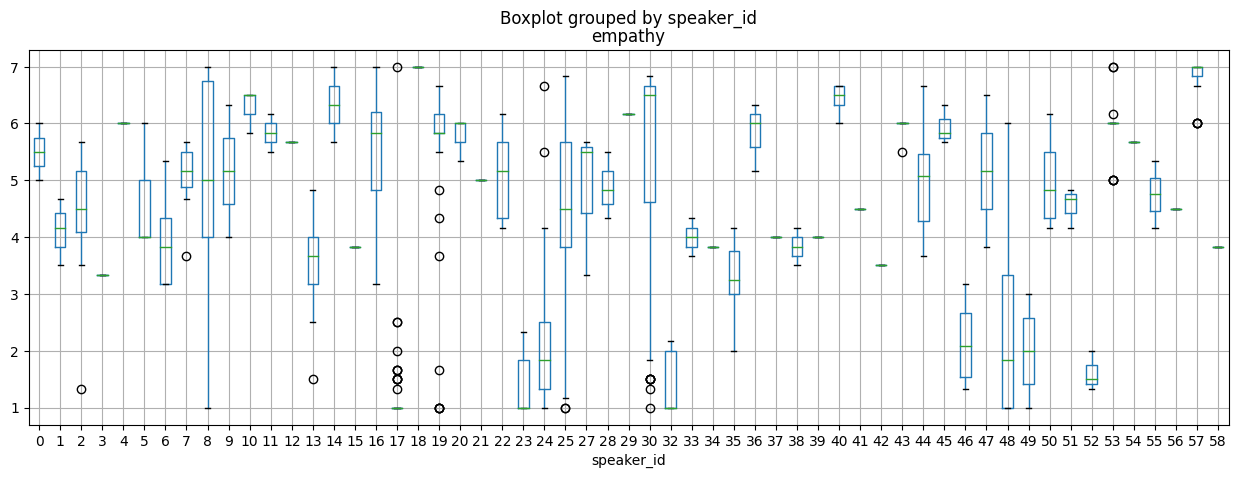

In [44]:
train.boxplot(column=['empathy'], by='speaker_id', figsize=(15,5))

<Axes: xlabel='empathy', ylabel='distress'>

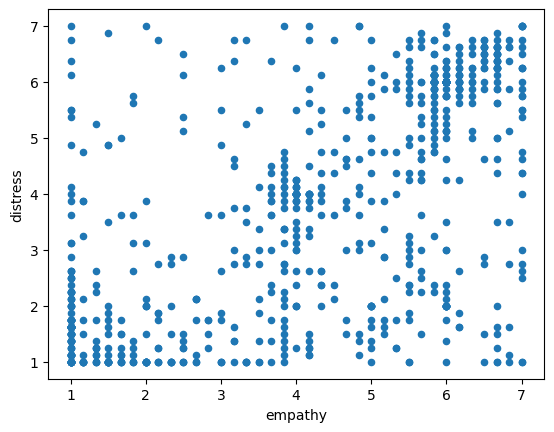

In [49]:
train.plot.scatter(x='empathy', y='distress')

# Combine WS22 and WS23

In [9]:
train_WS22 = './data/WASSA22/messages_train_ready_for_WS.tsv'
train_WS23 = './data/WASSA23/WASSA23_essay_level_with_labels_train.tsv'

In [10]:
train_WS22 = pd.read_csv(train_WS22, sep='\t', header=0)
train_WS23 = pd.read_csv(train_WS23, sep='\t', na_values='unknown', header=0)

In [11]:
train_WS22.dropna(inplace=True)
train_WS23.dropna(inplace=True)

In [12]:
train_WS22.select_dtypes(exclude='number').columns.tolist()

['message_id', 'response_id', 'essay', 'emotion']

In [13]:
train_WS23.select_dtypes(exclude='number').columns.tolist()

['essay', 'split', 'emotion']

In [19]:
column_WS22 = train_WS22.columns.tolist()

In [20]:
column_WS23 = train_WS23.columns.tolist()

In [21]:
common_columns = [i for i in column_WS22 if i in column_WS23]

In [22]:
common_columns

['article_id',
 'empathy',
 'distress',
 'essay',
 'emotion',
 'gender',
 'education',
 'race',
 'age',
 'income',
 'personality_conscientiousness',
 'personality_openess',
 'personality_extraversion',
 'personality_agreeableness',
 'personality_stability',
 'iri_perspective_taking',
 'iri_personal_distress',
 'iri_fantasy',
 'iri_empathatic_concern']

In [23]:
train_WS22 = train_WS22[common_columns]
train_WS23 = train_WS23[common_columns]

In [32]:
train_WS22.shape

(1860, 19)

In [33]:
train_WS23.shape

(779, 19)

In [28]:
train_WS = pd.concat([train_WS22, train_WS23], ignore_index=True)

In [30]:
train_WS.shape

(2639, 19)

In [36]:
train_WS.to_csv('./data/essay-train-ws22-ws23.tsv', sep='\t')